<a href="https://colab.research.google.com/github/Tannerbrodess/zillow_linear_regression/blob/main/Zillow_Project_LinR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Reading in data and performing some exploratory analysis

In [ ]:
df = pd.read_csv('/content/zillow_final.csv')

In [ ]:
df.columns

Index(['Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Number Of Bathrooms', 'Number of Bedrooms', 'Price',
       'Price Per Square Foot', 'Square Feet', 'Year Built', 'Sold'],
      dtype='object')

In [ ]:
df.head(5)

,Address,City,State,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold
0,3801 SW Pecan Cir,Bentonville,AR,72713,36.312013,-94.344779,3,4,523525,215,2435,2024,0
1,5303 SW Tea Olive Ln,Bentonville,AR,72713,36.335038,-94.273505,3,4,509425,205,2485,2024,0
2,1470 Sweetbriar Way,Centerton,AR,72719,36.348724,-94.306778,3,4,489950,182,2698,2017,0
3,1903 SE Clark St,Bentonville,AR,72712,36.353581,-94.190079,2,3,549900,300,1835,1978,0
4,5823 W Stoney Brook Rd,Rogers,AR,72758,36.317786,-94.197016,2,3,599000,259,2311,1996,0


In [ ]:
df.shape

(600, 13)

In [ ]:
df.describe()

,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold
count,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000
mean,72735.831667,36.268264,-94.177658,2.870000,3.611667,5.933675e+05,237.016667,2437.466667,1999.646667,0.500000
std,34.850024,0.091849,0.055370,1.105352,0.790721,5.874465e+05,141.166402,1169.145011,21.909858,0.500417
min,72113.000000,35.991870,-94.344779,1.000000,1.000000,1.800000e+05,95.000000,600.000000,1885.000000,0.000000
25%,72712.000000,36.223904,-94.210842,2.000000,3.000000,3.550000e+05,185.000000,1745.000000,1989.000000,0.000000
50%,72745.000000,36.289639,-94.172014,3.000000,4.000000,4.462575e+05,205.000000,2200.500000,2004.500000,0.500000
75%,72758.000000,36.335134,-94.137719,3.000000,4.000000,5.960000e+05,228.250000,2826.500000,2017.000000,1.000000
max,72764.000000,36.402014,-94.049108,10.000000,7.000000,5.855000e+06,1763.000000,10004.000000,2024.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                600 non-null    object 
 1   City                   600 non-null    object 
 2   State                  600 non-null    object 
 3   Zip Code               600 non-null    int64  
 4   Latitude               600 non-null    float64
 5   Longitude              600 non-null    float64
 6   Number Of Bathrooms    600 non-null    int64  
 7   Number of Bedrooms     600 non-null    int64  
 8   Price                  600 non-null    int64  
 9   Price Per Square Foot  600 non-null    int64  
 10  Square Feet            600 non-null    int64  
 11  Year Built             600 non-null    int64  
 12  Sold                   600 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 61.1+ KB


<Axes: xlabel='City', ylabel='Sold'>

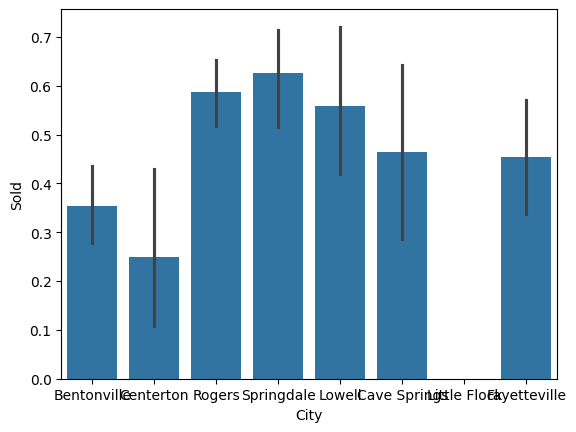

In [ ]:
sns.barplot(x='City', y='Sold', data=df)

In [ ]:
grouped_data_0 = df.loc[df['Sold'] == 0].groupby('City').size()
grouped_data_1 = df.loc[df['Sold'] == 1].groupby('City').size()


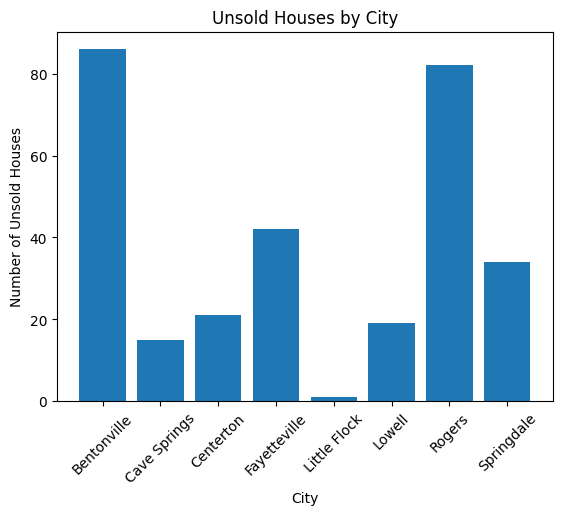

In [ ]:
plt.bar(grouped_data_0.index, grouped_data_0.values)
plt.xlabel("City")
plt.ylabel("Number of Unsold Houses")
plt.title("Unsold Houses by City")
angle = 45
plt.xticks(rotation=angle)
plt.show()

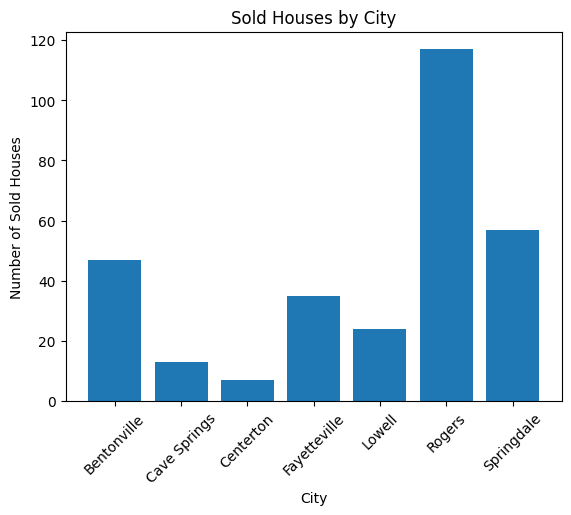

In [ ]:
plt.bar(grouped_data_1.index, grouped_data_1.values)
plt.xlabel("City")
plt.ylabel("Number of Sold Houses")
plt.title("Sold Houses by City")
angle = 45
plt.xticks(rotation=angle)
plt.show()

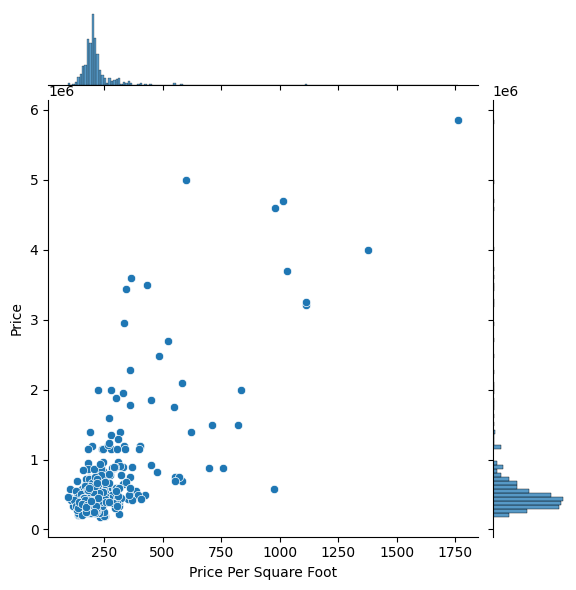

In [ ]:
sns.jointplot(x='Price Per Square Foot', y='Price', data=df)

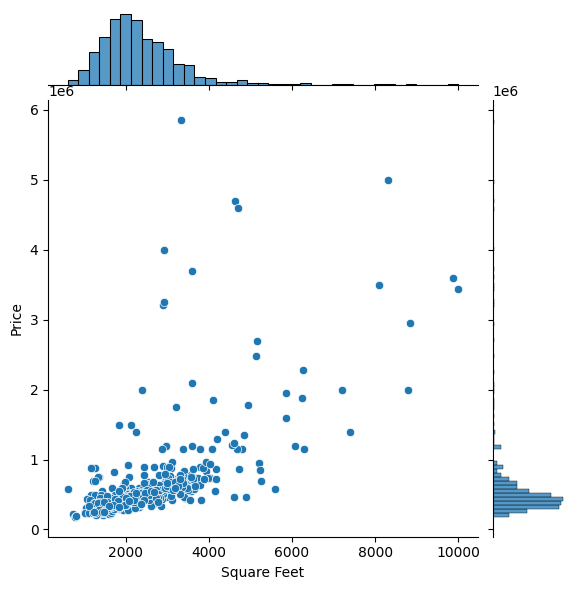

In [ ]:
sns.jointplot(x='Square Feet', y='Price', data=df)

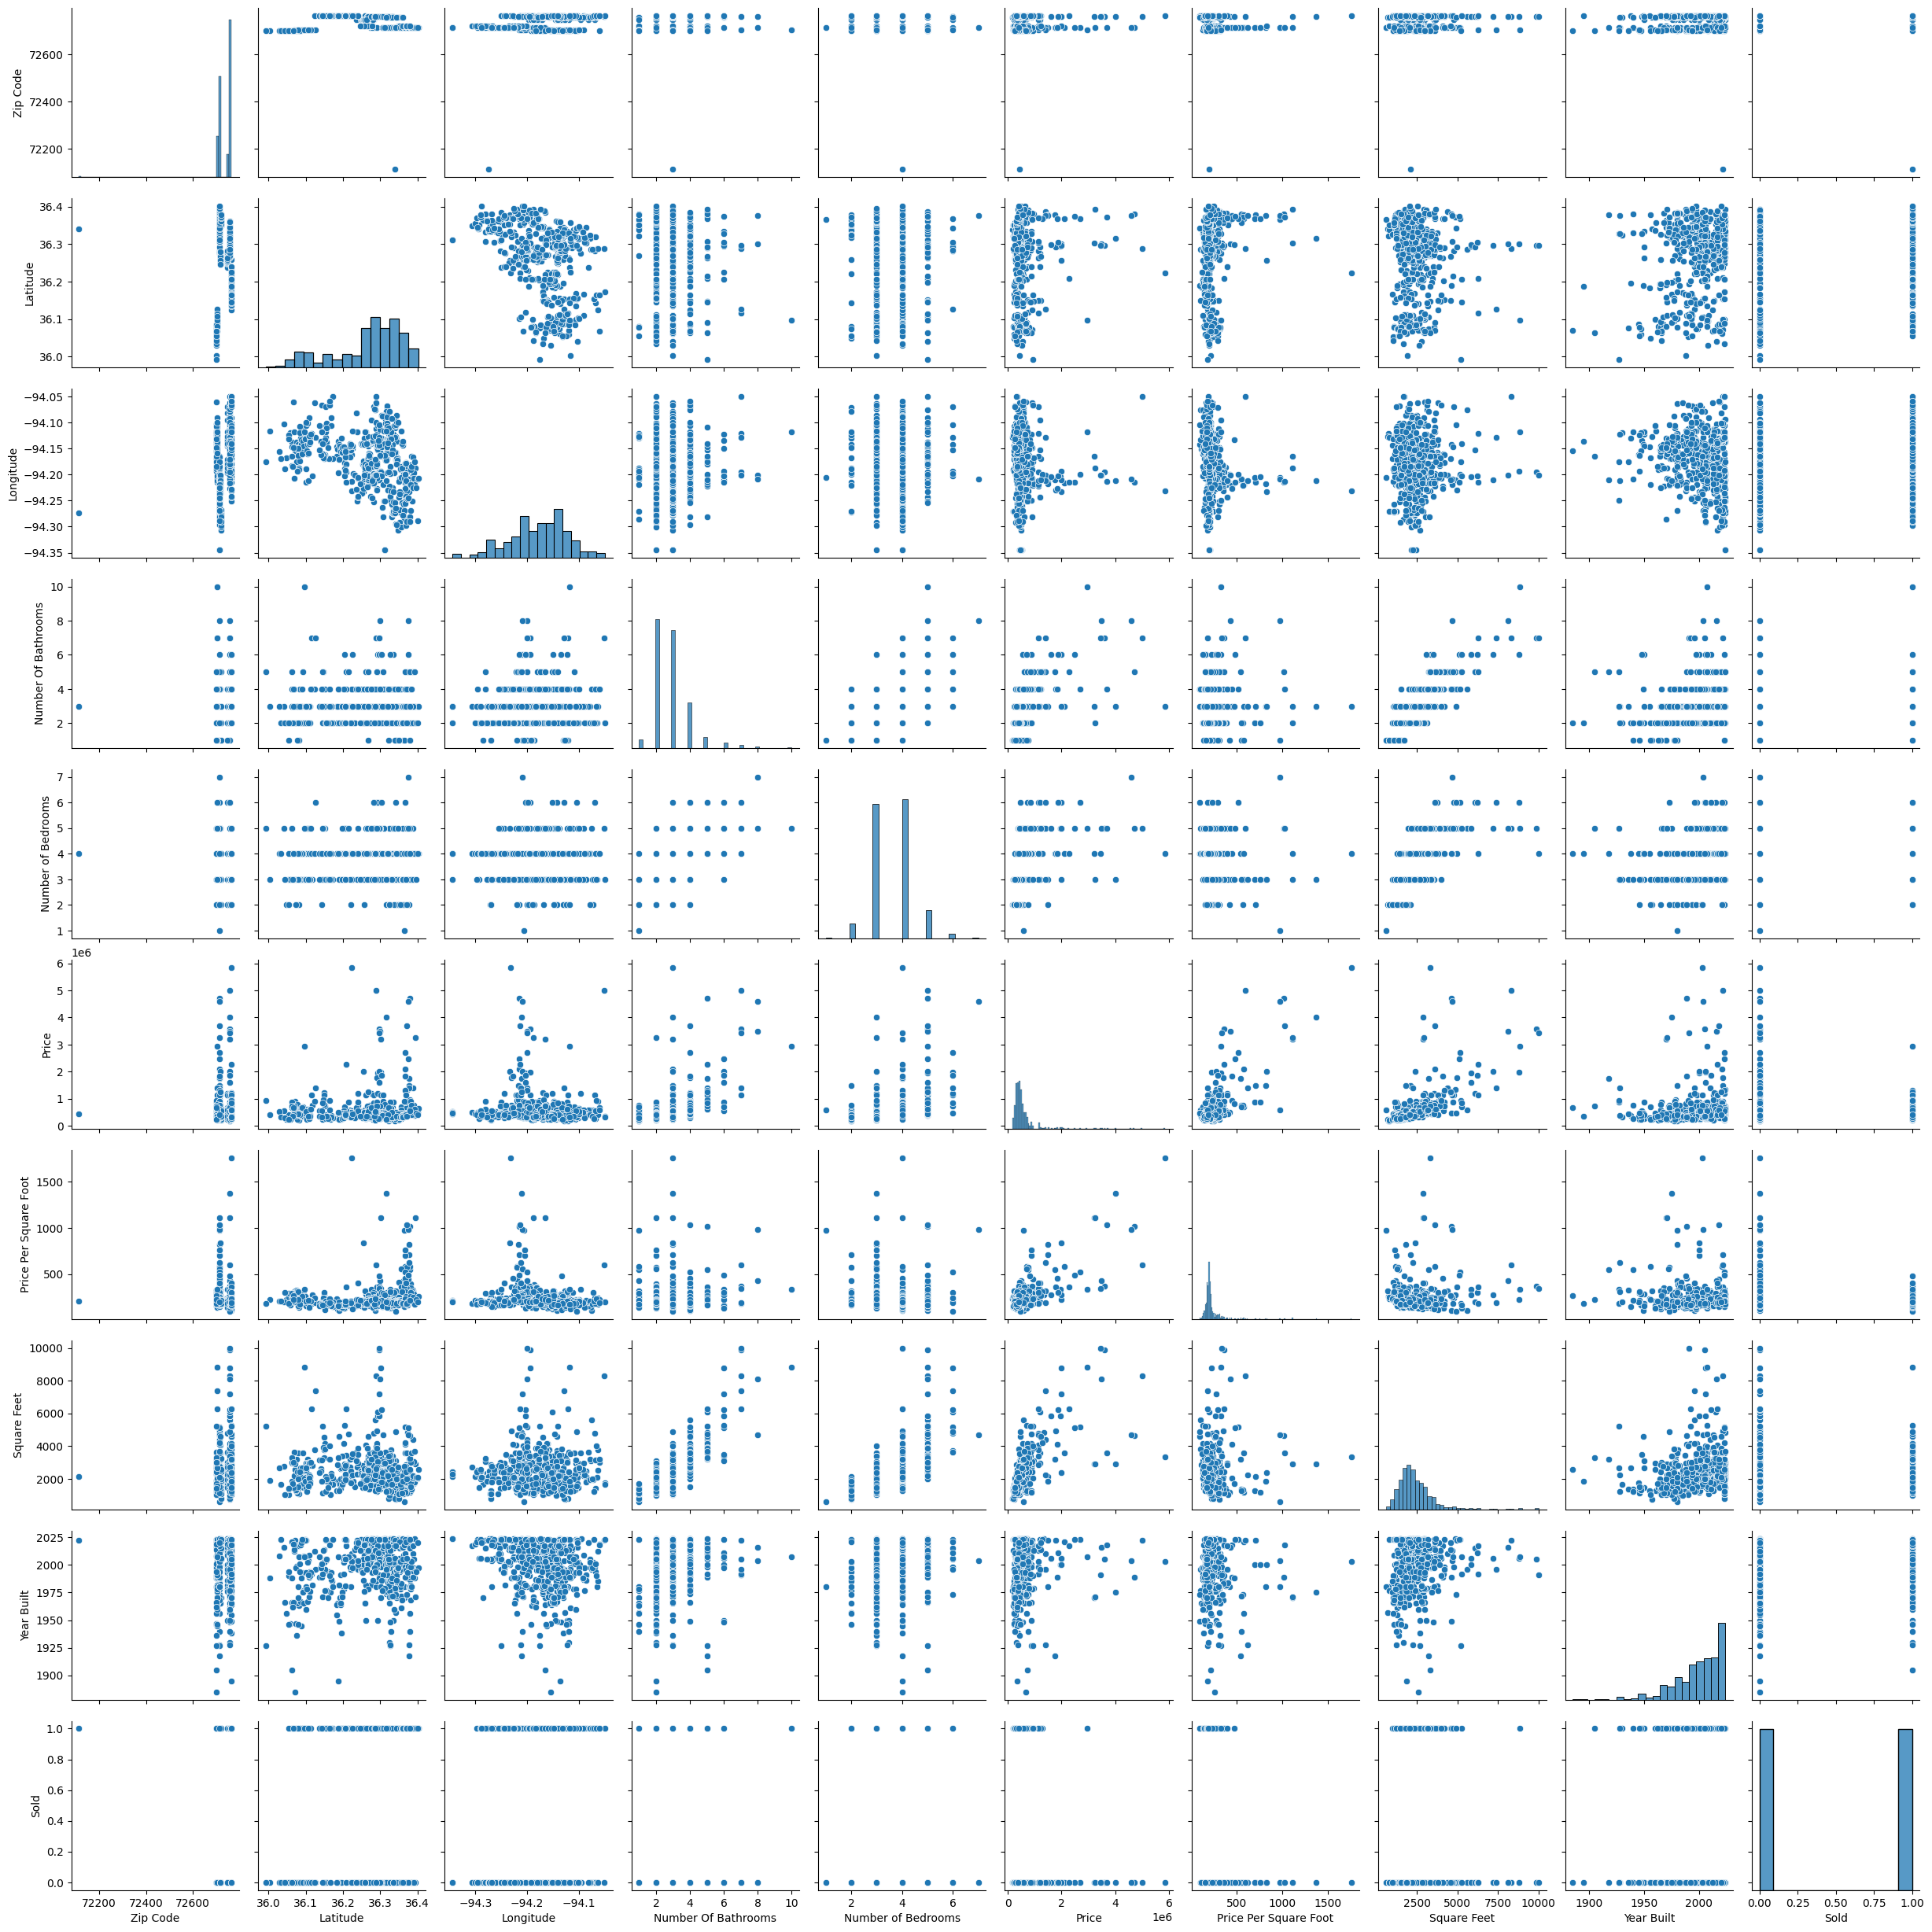

In [ ]:
sns.pairplot(df)

<ipython-input-185-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

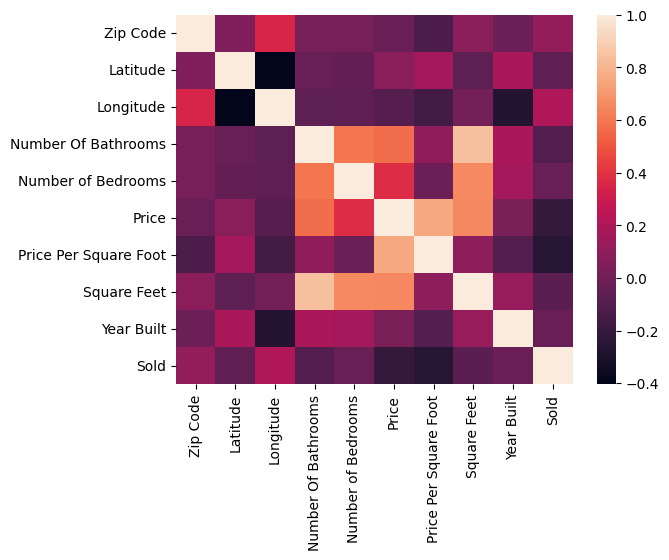

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='Latitude', ylabel='Longitude'>

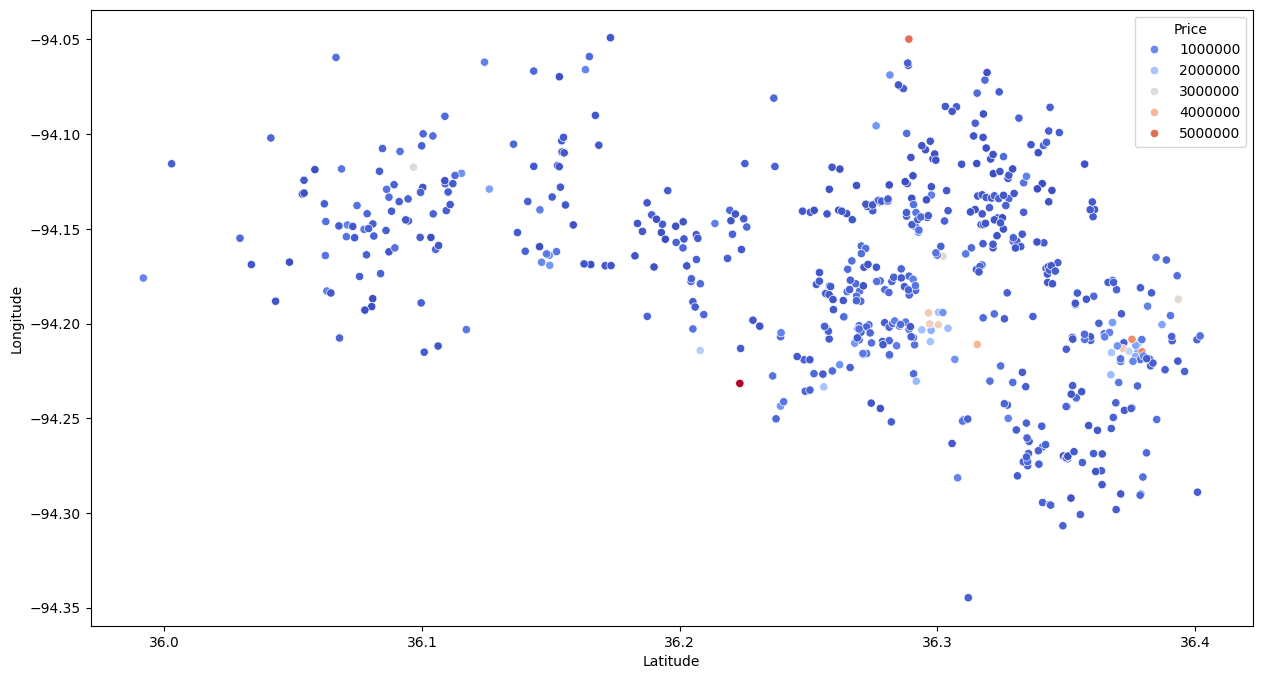

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Price', palette='coolwarm')

<Axes: xlabel='Latitude', ylabel='Longitude'>

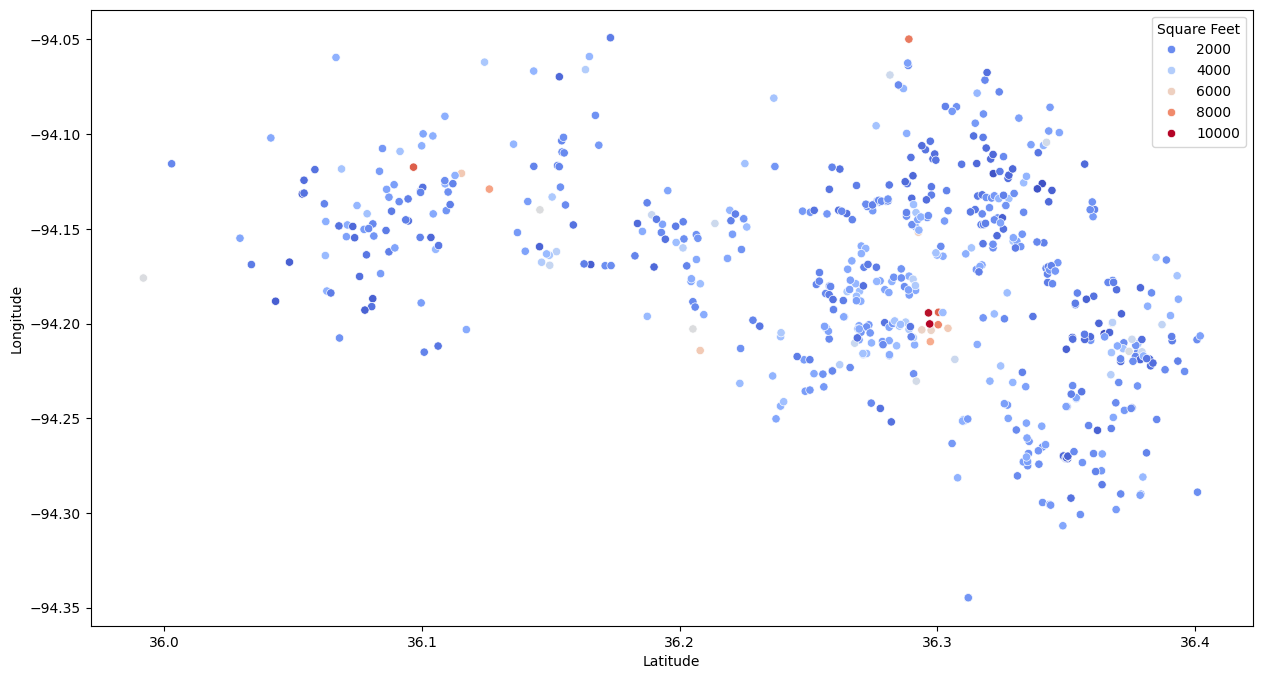

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Square Feet', palette='coolwarm')

In [ ]:
df['Square Feet Per Room'] = df['Square Feet'] / df['Number of Bedrooms']

In [ ]:
df['Dollar Per Room'] = df['Price'] / df['Number of Bedrooms']

In [ ]:
df.head(5)

,Address,City,State,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room
0,3801 SW Pecan Cir,Bentonville,AR,72713,36.312013,-94.344779,3,4,523525,215,2435,2024,0,608.750000,130881.250000
1,5303 SW Tea Olive Ln,Bentonville,AR,72713,36.335038,-94.273505,3,4,509425,205,2485,2024,0,621.250000,127356.250000
2,1470 Sweetbriar Way,Centerton,AR,72719,36.348724,-94.306778,3,4,489950,182,2698,2017,0,674.500000,122487.500000
3,1903 SE Clark St,Bentonville,AR,72712,36.353581,-94.190079,2,3,549900,300,1835,1978,0,611.666667,183300.000000
4,5823 W Stoney Brook Rd,Rogers,AR,72758,36.317786,-94.197016,2,3,599000,259,2311,1996,0,770.333333,199666.666667


In [ ]:
df.corr()

<ipython-input-191-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room
Zip Code,1.000000,0.049708,0.351628,0.020450,0.019979,-0.021474,-0.119412,0.079172,-0.015759,0.112145,0.095725,-0.037929
Latitude,0.049708,1.000000,-0.404203,-0.028779,-0.043372,0.081850,0.168276,-0.059826,0.190803,-0.058144,-0.057527,0.103596
Longitude,0.351628,-0.404203,1.000000,-0.063661,-0.057802,-0.088641,-0.156806,0.009502,-0.268606,0.200347,0.054869,-0.092220
Number Of Bathrooms,0.020450,-0.028779,-0.063661,1.000000,0.595388,0.569142,0.103815,0.835921,0.189530,-0.105635,0.706292,0.404765
Number of Bedrooms,0.019979,-0.043372,-0.057802,0.595388,1.000000,0.378327,-0.018233,0.656672,0.171398,-0.027424,0.236623,0.108441
Price,-0.021474,0.081850,-0.088641,0.569142,0.378327,1.000000,0.757115,0.654278,0.037739,-0.210321,0.588003,0.930623
Price Per Square Foot,-0.119412,0.168276,-0.156806,0.103815,-0.018233,0.757115,1.000000,0.095015,-0.094948,-0.259532,0.121789,0.862559
Square Feet,0.079172,-0.059826,0.009502,0.835921,0.656672,0.654278,0.095015,1.000000,0.123735,-0.072878,0.869064,0.488034
Year Built,-0.015759,0.190803,-0.268606,0.189530,0.171398,0.037739,-0.094948,0.123735,1.000000,-0.020556,0.070030,-0.020482
Sold,0.112145,-0.058144,0.200347,-0.105635,-0.027424,-0.210321,-0.259532,-0.072878,-0.020556,1.000000,-0.057351,-0.226367


<ipython-input-192-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

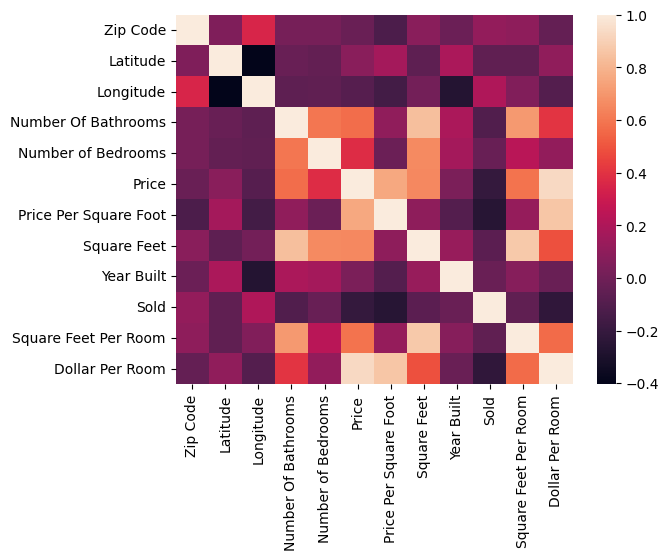

In [ ]:
sns.heatmap(df.corr())

From initial analysis, it appears that location has the biggest impact on whether the house was sold. However, the biggest impacts on price are in order:


1.   Price per square foot
2.   Square feet
3.   Number of bathrooms
4.   Number of bedrooms



**Clean**

In [ ]:
df = pd.get_dummies(data=df, columns=['City'], drop_first=True)


In [ ]:
df = pd.get_dummies(data=df, columns=['Zip Code'], drop_first=True)


In [ ]:
df = df.drop('State', axis=1)

In [ ]:
df.shape

(600, 31)

In [ ]:
df = df.drop(['Address', 'Longitude', 'Latitude' ], axis=1)


In [ ]:
df.head(5)

,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room,City_Cave Springs,...,Zip Code_72704,Zip Code_72712,Zip Code_72713,Zip Code_72718,Zip Code_72719,Zip Code_72745,Zip Code_72756,Zip Code_72758,Zip Code_72762,Zip Code_72764
0,3,4,523525,215,2435,2024,0,608.750000,130881.250000,0,...,0,0,1,0,0,0,0,0,0,0
1,3,4,509425,205,2485,2024,0,621.250000,127356.250000,0,...,0,0,1,0,0,0,0,0,0,0
2,3,4,489950,182,2698,2017,0,674.500000,122487.500000,0,...,0,0,0,0,1,0,0,0,0,0
3,2,3,549900,300,1835,1978,0,611.666667,183300.000000,0,...,0,1,0,0,0,0,0,0,0,0
4,2,3,599000,259,2311,1996,0,770.333333,199666.666667,0,...,0,0,0,0,0,0,0,1,0,0


**Linear Regression**

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[ 3.97506452e+04 -5.02036711e+04 -3.41936817e+02  3.52630759e+02
  2.29352336e+02  1.00663284e+04 -1.46740963e+03  3.92020226e+00
  1.08822398e+04 -8.18127372e+03  1.45717991e+04 -6.30719262e+04
  2.52601599e+04  5.62748782e+04  4.89193586e+04  2.62641138e+04
  3.59599156e+04  2.28816615e+04  6.37881873e+04  1.97902548e+04
  1.08822398e+04  5.21923915e+04  2.52601599e+04  1.94428720e+04
 -2.62399200e+04 -1.90510946e+04 -2.56343860e+03]


In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Number Of Bathrooms,39750.645231
Number of Bedrooms,-50203.671059
Price Per Square Foot,-341.936817
Square Feet,352.630759
Year Built,229.352336
Sold,10066.328404
Square Feet Per Room,-1467.409630
Dollar Per Room,3.920202
City_Cave Springs,10882.239761
City_Centerton,-8181.273723


In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

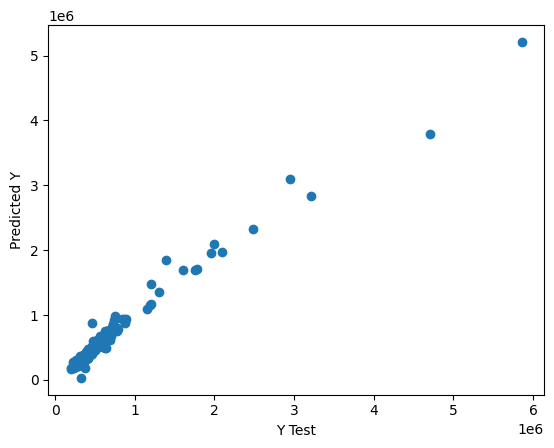

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 56971.50887177937
MSE: 12797969774.161716
RMSE: 113128.11221867762


<ipython-input-210-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


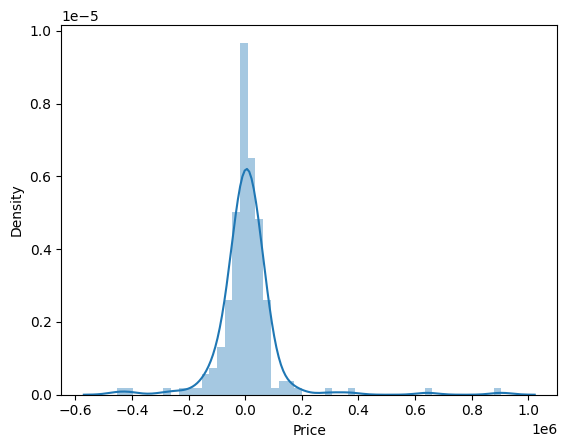

In [ ]:
sns.distplot((y_test-predictions),bins=50);

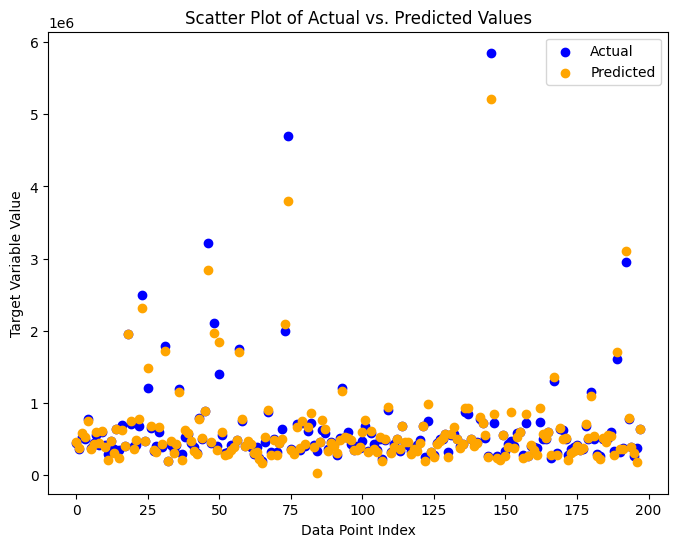

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your y_test and predictions arrays
y_test = y_test
predictions = predictions

# Create the scatter plot with different colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='orange', label='Predicted')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable Value')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
columns = ['y_test', 'predictions']

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  # Assuming y_test holds actual values

# List of tuples approach:
results_list = list(zip(y_test, predictions))

results_df = pd.DataFrame(results_list, columns=columns)

In [ ]:
results_df

,y_test,predictions
0,445000,452763.070204
1,355000,375579.721005
2,520000,577483.515486
3,495000,518564.036398
4,775000,751771.477899
...,...,...
193,769000,782418.144246
194,389900,379938.320059
195,264900,303475.744029
196,370000,181049.763131


In [ ]:
results_df['difference'] = results_df['y_test'] - results_df['predictions']

In [ ]:
results_df['difference'].mean()

6654.577829143331

In [ ]:
results_df

,y_test,predictions,difference
0,445000,452763.070204,-7763.070204
1,355000,375579.721005,-20579.721005
2,520000,577483.515486,-57483.515486
3,495000,518564.036398,-23564.036398
4,775000,751771.477899,23228.522101
...,...,...,...
193,769000,782418.144246,-13418.144246
194,389900,379938.320059,9961.679941
195,264900,303475.744029,-38575.744029
196,370000,181049.763131,188950.236869


**Min Max Scaler Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
all_min_max = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


In [ ]:
all_min_max.head()

,Number Of Bathrooms,Number of Bedrooms,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room,City_Cave Springs,City_Centerton,...,Zip Code_72704,Zip Code_72712,Zip Code_72713,Zip Code_72718,Zip Code_72719,Zip Code_72745,Zip Code_72756,Zip Code_72758,Zip Code_72762,Zip Code_72764
0,0.142857,0.333333,0.070755,0.113994,0.719424,1.0,0.108001,0.036066,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.142857,0.333333,0.036164,0.154190,0.683453,1.0,0.165825,0.031213,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.142857,0.333333,0.044025,0.168439,0.791367,1.0,0.186324,0.042623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.142857,0.333333,0.792453,0.247023,0.618705,0.0,0.299373,0.803279,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.500000,0.083333,0.183433,1.000000,0.0,0.118977,0.046745,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
lm = LinearRegression()
lm.fit(all_min_max, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[ 2.78254517e+05 -3.01222026e+05 -4.34943631e+05  3.31613966e+06
  3.18799747e+04  1.00663284e+04 -3.19748558e+06  4.98192371e+06
  1.08822398e+04 -8.18127372e+03  1.45717991e+04 -6.30719262e+04
  2.52601599e+04  5.62748782e+04  4.89193586e+04  2.62641138e+04
  3.59599156e+04  2.28816615e+04  6.37881873e+04  1.97902548e+04
  1.08822398e+04  5.21923915e+04  2.52601599e+04  1.94428720e+04
 -2.62399200e+04 -1.90510946e+04 -2.56343860e+03]


In [ ]:
cdf_min_max = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf_min_max

,Coeff
Number Of Bathrooms,2.782545e+05
Number of Bedrooms,-3.012220e+05
Price Per Square Foot,-4.349436e+05
Square Feet,3.316140e+06
Year Built,3.187997e+04
Sold,1.006633e+04
Square Feet Per Room,-3.197486e+06
Dollar Per Room,4.981924e+06
City_Cave Springs,1.088224e+04
City_Centerton,-8.181274e+03


In [ ]:
all_min_max_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [ ]:
predictions = lm.predict(all_min_max_test)

Text(0, 0.5, 'Predicted Y')

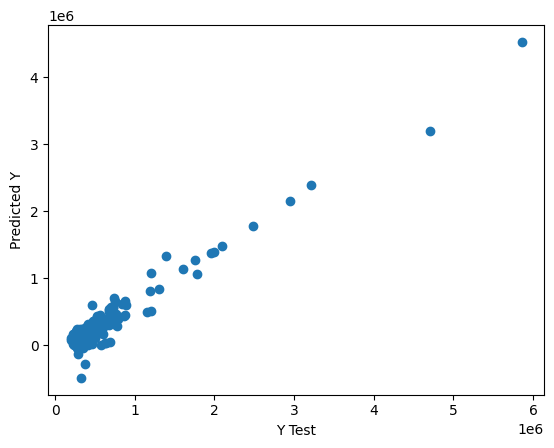

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 277141.8833669551
MSE: 113503664542.76587
RMSE: 336903.0491740404


<ipython-input-227-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


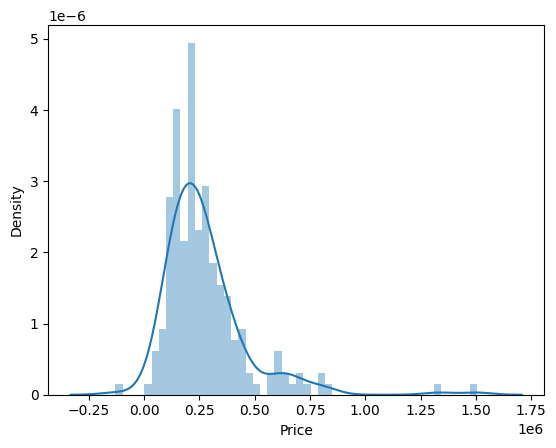

In [ ]:
sns.distplot((y_test-predictions),bins=50);

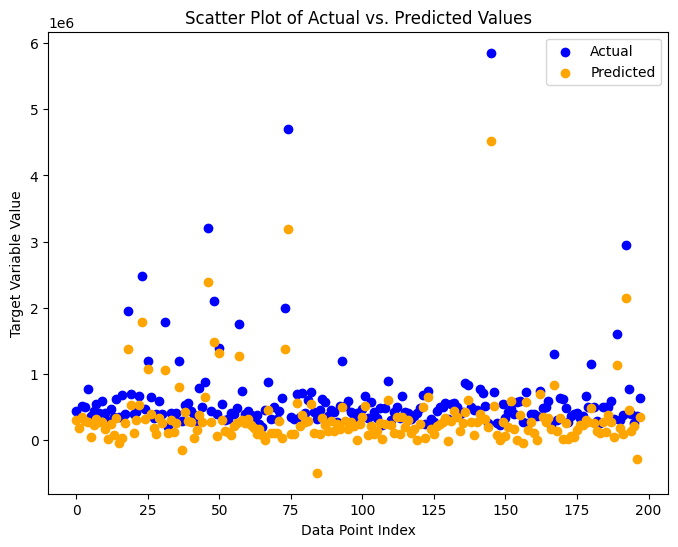

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your y_test and predictions arrays
y_test = y_test
predictions = predictions

# Create the scatter plot with different colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='orange', label='Predicted')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable Value')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
columns = ['y_test', 'predictions']

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  # Assuming y_test holds actual values

# List of tuples approach:
results_list = list(zip(y_test, predictions))

results_df = pd.DataFrame(results_list, columns=columns)

In [ ]:
results_df

,y_test,predictions
0,445000,301334.300880
1,355000,180224.135736
2,520000,351540.143207
3,495000,289652.020458
4,775000,278795.817545
...,...,...
193,769000,457378.818689
194,389900,134387.685289
195,264900,216830.854731
196,370000,-279645.192062


In [ ]:
results_df['difference'] = results_df['y_test'] - results_df['predictions']

In [ ]:
results_df['difference'].mean()

275835.22330526996

In [ ]:
results_df

,y_test,predictions,difference
0,445000,301334.300880,143665.699120
1,355000,180224.135736,174775.864264
2,520000,351540.143207,168459.856793
3,495000,289652.020458,205347.979542
4,775000,278795.817545,496204.182455
...,...,...,...
193,769000,457378.818689,311621.181311
194,389900,134387.685289,255512.314711
195,264900,216830.854731,48069.145269
196,370000,-279645.192062,649645.192062


**Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)

[  43073.27336101  -39582.75417417  -45594.53906721  414275.31670339
    5051.4513869     5029.17605604 -335553.30205723  521793.84638464
    2421.3879249    -1736.08529127     587.54541347   -4680.25082974
    5984.96428084   11877.14810468   13464.08573284    8690.17897774
   11773.38086762    3070.16499385   21752.07587334    5650.89355651
    2421.3879249    10794.01479695    5984.96428084   15064.54292841
    1943.34815025   -1831.33506909    2687.79540314]


In [ ]:
cdf_ss = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf_ss

,Coeff
Number Of Bathrooms,43073.273361
Number of Bedrooms,-39582.754174
Price Per Square Foot,-45594.539067
Square Feet,414275.316703
Year Built,5051.451387
Sold,5029.176056
Square Feet Per Room,-335553.302057
Dollar Per Room,521793.846385
City_Cave Springs,2421.387925
City_Centerton,-1736.085291


In [ ]:
all_ss_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [ ]:
predictions = lm.predict(all_ss_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

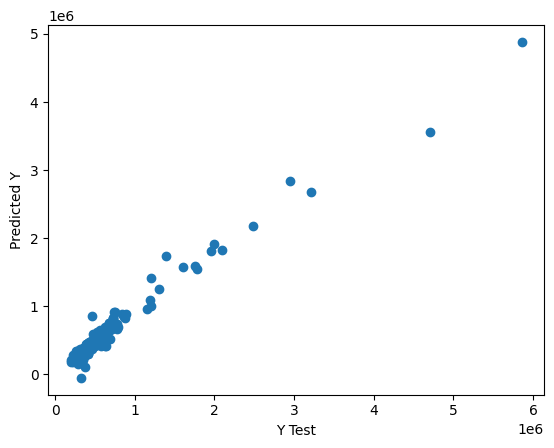

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 71633.78816685491
MSE: 20739608179.80086
RMSE: 144012.52785713074


<ipython-input-245-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


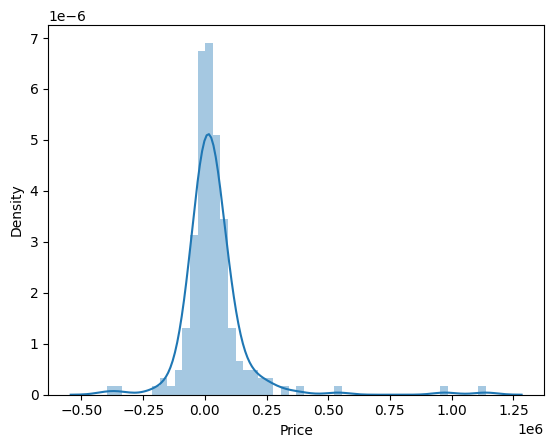

In [ ]:
sns.distplot((y_test-predictions),bins=50);

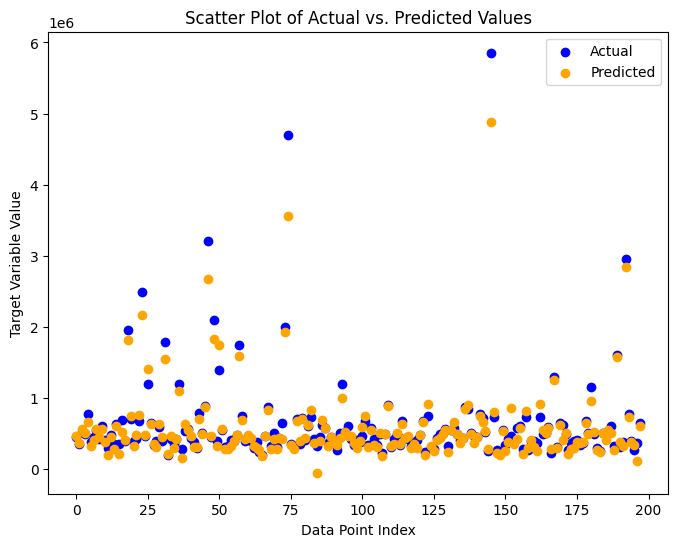

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your y_test and predictions arrays
y_test = y_test
predictions = predictions

# Create the scatter plot with different colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='orange', label='Predicted')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable Value')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
columns = ['y_test', 'predictions']

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  # Assuming y_test holds actual values

# List of tuples approach:
results_list = list(zip(y_test, predictions))

results_df = pd.DataFrame(results_list, columns=columns)

In [ ]:
results_df['difference'] = results_df['y_test'] - results_df['predictions']

In [ ]:
results_df['difference'].mean()

35037.92688074785

In [ ]:
results_df

,y_test,predictions,difference
0,445000,456402.663499,-11402.663499
1,355000,367194.559316,-12194.559316
2,520000,564765.134698,-44765.134698
3,495000,506174.926215,-11174.926215
4,775000,658017.880690,116982.119310
...,...,...,...
193,769000,737571.401965,31428.598035
194,389900,377527.225995,12372.774005
195,264900,337722.957418,-72822.957418
196,370000,106924.656899,263075.343101
